In [1]:
# ! ls Datasets/new_test
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/Training Dataset"


Fire  NoFire


In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [8]:
#DATADIR = r'D:\EDU Files\project\fire\MNet_Vgg Fire tuning\BowFire_Data'
DATADIR = '/content/drive/My Drive/Training Dataset'
CATEGORIES = ['Fire', 'NoFire']

In [9]:
IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

    return training_data

In [10]:
training_data = create_training_data()


100%|██████████| 1301/1301 [00:52<00:00, 24.82it/s]


In [11]:
import random
test_image_num=58704
print(len(training_data))
random.shuffle(training_data)
test_labels=np.zeros((test_image_num,1))

c=0
for sample in training_data:
    test_labels[c]=(sample[1])
    c+=1
print(c)
actual_labels=(test_labels.reshape(test_image_num,))
print(actual_labels.shape)
actual_labels.astype(int)

2423
2423
(58704,)


array([1, 0, 0, ..., 0, 0, 0])

In [46]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X.shape[1:]

Y = np.array(Y)

In [47]:
!ls "/content/drive/My Drive/TrainedModels"

Fire-64x64-color-v7.1-soft.h5


In [48]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/TrainedModels/Fire-64x64-color-v7.1-soft.h5')

In [49]:
predictions = model.predict(X)
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = predicted_labels.astype(int)
# syntax outdated, so updated

76/76 [==============================] - 3s 37ms/step


Confusion matrix, without normalization
[[1076   47]
 [  26 1274]]


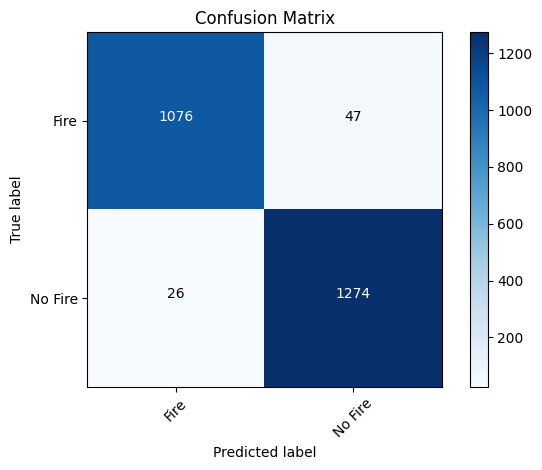

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

actual_labels = actual_labels[:len(training_data)]
cm = confusion_matrix(actual_labels, predicted_labels)
#test_batches.class_indices
cm_plot_labels=['Fire','No Fire']
plot_confusion_matrix(cm, cm_plot_labels,title='Confusion Matrix')

In [52]:
tp=cm[0][0]
fn=cm[0][1]
fp=cm[1][0]
tn=cm[1][1]
print("tp"+' '+str(tp))
print("fn"+' '+str(fn))
print("fp"+' '+str(fp))
print("tn"+' '+str(tn))

tp 1076
fn 47
fp 26
tn 1274


In [53]:
Recall=tp/(tp+fn)
Precision=tp/(tp+fp)
f_measure= 2*((Precision*Recall)/(Precision+Recall))

print(Precision, Recall, f_measure)



0.9764065335753176 0.9581478183437222 0.9671910112359551


In [54]:
model.evaluate(X, Y)

76/76 [==============================] - 4s 44ms/step - loss: 0.1640 - accuracy: 0.9699


[0.16398754715919495, 0.9698720574378967]